#**Mini-Project 2: Time Series Forecasting using NN, LSTM and CNN** 

## **Implementation: Fully Connected Neural Network- Hyperparameter Tuning**

######Import required helper functions

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "/content/drive/My Drive/P2_TimeForecast/P2_CodeBase/"
!pip install import-ipynb
import import_ipynb

# importing helper functions for data preprocessing and model visualization
import plotlib_helper as graphplot
import datapreprocess_helper as dataprep

/content/drive/My Drive/P2_TimeForecast/P2_CodeBase
importing Jupyter notebook from plotlib_helper.ipynb
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
importing Jupyter notebook from datapreprocess_helper.ipynb
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###### Define path

In [3]:
path="/content/drive/My Drive/P2_TimeForecast/P2_CodeBase/data"
dnn_path="/content/drive/My Drive/P2_TimeForecast/P2_CodeBase/dnn"


### **Load data**

In [4]:
import pandas as pd
import os
import numpy as np 

filename_read = os.path.join(path,"P2_preprocessed_NN.csv")
df = pd.read_csv(filename_read,na_values=['NA','?','-'])

print("dataset:", df.shape)

dataset: (4384, 36)


### **Split dataset into train set and test set**

In [5]:
from sklearn.model_selection import train_test_split
x, y = dataprep.to_xy(df,'35')
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state =42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3068, 35)
(1316, 35)
(3068,)
(1316,)


### **Implement fully connected Neural Network**


##### **Implement fully connected Neural Network**


##### **CASE: MULTIPLE LAYERS**


In [6]:
from sklearn import metrics
multiple_layers={'100-10-50':0,'50-25-10':0,'100-25-10-50':0}

###### **Case A: Layers 3 - 100,10,50** **bold text**










In [7]:
layers=[100,10,50]
activation=["ReLu"]
optimizer=["adam"]
parameters={'layers':layers, 'activation': activation, 'optimizer': optimizer}
print(parameters)

{'layers': [100, 10, 50], 'activation': ['ReLu'], 'optimizer': ['adam']}


In [8]:
import io
import requests
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

bestModelPath=os.path.join(dnn_path,"P2_NN_BestModel_CA1.hdf5")

checkpointer = ModelCheckpoint(filepath=bestModelPath, verbose=0, save_best_only=True) # save best model
start_time = datetime.now()
for i in range(5):
    print(i)
    model = Sequential()  
    model.add(Dense(100,input_dim=x_train.shape[1], activation='relu'))   
    model.add(Dense(10,activation='relu'))
    model.add(Dense(50,activation='relu'))

    model.add(Dense(1))   
    model.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
  
time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
model.load_weights(bestModelPath)

model.summary()

0
Epoch 1/1000
96/96 - 0s - loss: 1075.0687 - val_loss: 153.7225
Epoch 2/1000
96/96 - 0s - loss: 144.4952 - val_loss: 108.2480
Epoch 3/1000
96/96 - 0s - loss: 85.0419 - val_loss: 49.8787
Epoch 4/1000
96/96 - 0s - loss: 35.0616 - val_loss: 18.5740
Epoch 5/1000
96/96 - 0s - loss: 13.7010 - val_loss: 8.1511
Epoch 6/1000
96/96 - 0s - loss: 5.8902 - val_loss: 4.6952
Epoch 7/1000
96/96 - 0s - loss: 3.1299 - val_loss: 2.8577
Epoch 8/1000
96/96 - 0s - loss: 1.9957 - val_loss: 2.3066
Epoch 9/1000
96/96 - 0s - loss: 1.7402 - val_loss: 1.8513
Epoch 10/1000
96/96 - 0s - loss: 1.3650 - val_loss: 1.5576
Epoch 11/1000
96/96 - 0s - loss: 1.2500 - val_loss: 1.5860
Epoch 12/1000
96/96 - 0s - loss: 1.5590 - val_loss: 1.5867
Epoch 13/1000
96/96 - 0s - loss: 1.2608 - val_loss: 1.3179
Epoch 14/1000
96/96 - 0s - loss: 1.2265 - val_loss: 1.3999
Epoch 15/1000
96/96 - 0s - loss: 1.2997 - val_loss: 1.2999
Epoch 16/1000
96/96 - 0s - loss: 1.1948 - val_loss: 1.3258
Epoch 17/1000
96/96 - 0s - loss: 1.3988 - val_los

###### **Model Performance Evaluation**


-------- Performance Evalutation for  Neural Networks  --------
-------- Parameters:  {'layers': [100, 10, 50], 'activation': ['ReLu'], 'optimizer': ['adam']}  --------

RMSE         : 1.0371444
MSE          : 1.0756686
R2 score     : 0.9987145558752932
-------- Regression Chart --------


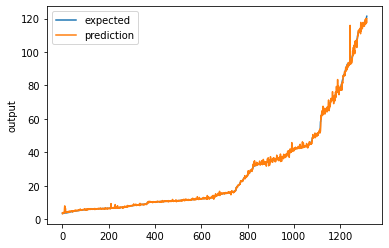

RMSE for multiple_layers:'100-10-50'=  1.037144422531128


In [9]:
pred = model.predict(x_test)
graphplot.regression_performance_metrics(y_test,pred,"Neural Networks",parameters)
graphplot.chart_regression(pred.flatten(),y_test)
multiple_layers['100-10-50']=np.sqrt(metrics.mean_squared_error(y_test, pred)).astype(float) 

print("RMSE for multiple_layers:'100-10-50'= ", multiple_layers['100-10-50'])

###### **Case 2: Layers 3- 50,25,10**










In [10]:
layers=[50,25,10]
activation=["ReLu"]
optimizer=["adam"]
parameters={'layers':layers, 'activation': activation, 'optimizer': optimizer}
print(parameters)

{'layers': [50, 25, 10], 'activation': ['ReLu'], 'optimizer': ['adam']}


In [11]:
import io
import requests
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

bestModelPath=os.path.join(dnn_path,"P2_NN_BestModel_CA2.hdf5")

checkpointer = ModelCheckpoint(filepath=bestModelPath, verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()  
    model.add(Dense(50,input_dim=x_train.shape[1], activation='relu'))   
    model.add(Dense(25,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1))   
    model.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
    
model.load_weights(bestModelPath)


0
Epoch 1/1000
96/96 - 0s - loss: 1257.7095 - val_loss: 161.4913
Epoch 2/1000
96/96 - 0s - loss: 120.9595 - val_loss: 79.5102
Epoch 3/1000
96/96 - 0s - loss: 53.1456 - val_loss: 25.3751
Epoch 4/1000
96/96 - 0s - loss: 15.8453 - val_loss: 8.1378
Epoch 5/1000
96/96 - 0s - loss: 5.6061 - val_loss: 3.5984
Epoch 6/1000
96/96 - 0s - loss: 3.2051 - val_loss: 3.5582
Epoch 7/1000
96/96 - 0s - loss: 2.4393 - val_loss: 2.2891
Epoch 8/1000
96/96 - 0s - loss: 1.9566 - val_loss: 1.9682
Epoch 9/1000
96/96 - 0s - loss: 1.7209 - val_loss: 2.3303
Epoch 10/1000
96/96 - 0s - loss: 1.8264 - val_loss: 2.0050
Epoch 11/1000
96/96 - 0s - loss: 1.5317 - val_loss: 1.6066
Epoch 12/1000
96/96 - 0s - loss: 1.5524 - val_loss: 2.0022
Epoch 13/1000
96/96 - 0s - loss: 1.4723 - val_loss: 1.5898
Epoch 14/1000
96/96 - 0s - loss: 1.4825 - val_loss: 1.5690
Epoch 15/1000
96/96 - 0s - loss: 1.5854 - val_loss: 1.4916
Epoch 16/1000
96/96 - 0s - loss: 1.4388 - val_loss: 3.1714
Epoch 17/1000
96/96 - 0s - loss: 1.7332 - val_loss: 

###### **Model Performance Evaluation**


-------- Performance Evalutation for  Neural Networks  --------
-------- Parameters:  {'layers': [50, 25, 10], 'activation': ['ReLu'], 'optimizer': ['adam']}  --------

RMSE         : 1.0922382
MSE          : 1.1929842
R2 score     : 0.998574361466429
-------- Regression Chart --------


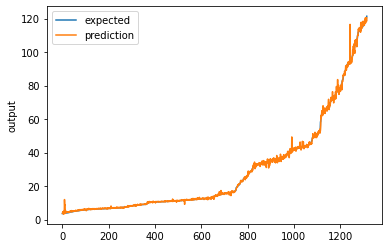

RMSE for multiple_layers:'50-25-10'=  1.092238187789917


In [12]:
pred = model.predict(x_test)
graphplot.regression_performance_metrics(y_test,pred,"Neural Networks",parameters)
graphplot.chart_regression(pred.flatten(),y_test)
multiple_layers['50-25-10']=np.sqrt(metrics.mean_squared_error(y_test, pred)).astype(float) 
print("RMSE for multiple_layers:'50-25-10'= ", multiple_layers['50-25-10'])

###### **Case 3: Layers 4- 100,25,10,50**










In [13]:
layers=[100,25,10,50]
activation=["ReLu"]
optimizer=["adam"]
parameters={'layers':layers, 'activation': activation, 'optimizer': optimizer}
print(parameters)

{'layers': [100, 25, 10, 50], 'activation': ['ReLu'], 'optimizer': ['adam']}


In [14]:
import io
import requests
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

bestModelPath=os.path.join(dnn_path,"P2_NN_BestModel_CA3.hdf5")

checkpointer = ModelCheckpoint(filepath=bestModelPath, verbose=0, save_best_only=True) # save best model
start_time = datetime.now()
for i in range(5):
    print(i)
    model = Sequential()  
    model.add(Dense(100,input_dim=x_train.shape[1], activation='relu'))   
    model.add(Dense(25,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1))   
    model.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
  
time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
model.load_weights(bestModelPath)



0
Epoch 1/1000
96/96 - 1s - loss: 1059.6511 - val_loss: 154.6952
Epoch 2/1000
96/96 - 0s - loss: 132.7937 - val_loss: 92.2393
Epoch 3/1000
96/96 - 0s - loss: 65.1250 - val_loss: 32.7569
Epoch 4/1000
96/96 - 0s - loss: 17.7783 - val_loss: 9.1380
Epoch 5/1000
96/96 - 0s - loss: 5.5427 - val_loss: 4.0539
Epoch 6/1000
96/96 - 0s - loss: 2.7387 - val_loss: 2.2701
Epoch 7/1000
96/96 - 0s - loss: 2.3420 - val_loss: 2.0499
Epoch 8/1000
96/96 - 0s - loss: 1.8860 - val_loss: 2.1048
Epoch 9/1000
96/96 - 0s - loss: 1.9083 - val_loss: 2.1582
Epoch 10/1000
96/96 - 0s - loss: 2.1705 - val_loss: 1.6759
Epoch 11/1000
96/96 - 0s - loss: 1.5424 - val_loss: 1.7020
Epoch 12/1000
96/96 - 0s - loss: 1.6471 - val_loss: 2.2484
Epoch 13/1000
96/96 - 0s - loss: 2.1212 - val_loss: 1.8395
Epoch 14/1000
96/96 - 0s - loss: 1.3923 - val_loss: 1.5244
Epoch 15/1000
96/96 - 0s - loss: 1.4819 - val_loss: 1.5642
Epoch 16/1000
96/96 - 0s - loss: 1.5450 - val_loss: 2.1998
Epoch 17/1000
96/96 - 0s - loss: 1.3547 - val_loss: 

###### **Model Performance Evaluation**


-------- Performance Evalutation for  Neural Networks  --------
-------- Parameters:  {'layers': [100, 25, 10, 50], 'activation': ['ReLu'], 'optimizer': ['adam']}  --------

RMSE         : 1.0566463
MSE          : 1.1165016
R2 score     : 0.9986657596154311
-------- Regression Chart --------


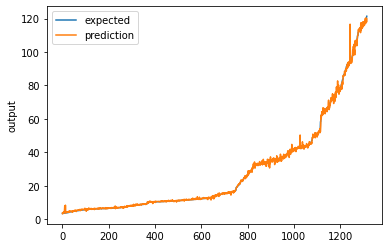

RMSE for multiple_layers:'100-25-10-50'=  1.0566463470458984


In [15]:
pred = model.predict(x_test)
graphplot.regression_performance_metrics(y_test,pred,"Neural Networks",parameters)
graphplot.chart_regression(pred.flatten(),y_test)
multiple_layers['100-25-10-50']=np.sqrt(metrics.mean_squared_error(y_test, pred)).astype(float) 
print("RMSE for multiple_layers:'100-25-10-50'= ", multiple_layers['100-25-10-50'])

##### **CASE B: ACTIVATION LAYERS**


In [16]:
activation_layers={'relu-adam':0,'relu-sgd':0,'sigmoid-adam':0,'sigmoid-sgd':0,'tanh-adam':0, 'tanh-sgd':0,'relu-custom_adam':0,'relu-custom_sgd':0}

###### **Case 1:ReLu-Adam**










In [17]:
layers=[500,100]
activation=["ReLu"]
optimizer=["adam"]
parameters={'layers':layers, 'activation': activation, 'optimizer': optimizer}
print(parameters)

{'layers': [500, 100], 'activation': ['ReLu'], 'optimizer': ['adam']}


In [31]:
import io
import requests
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

bestModelPath=os.path.join(dnn_path,"P2_NN_BestModel_CB1.hdf5")

checkpointer = ModelCheckpoint(filepath=bestModelPath, verbose=0, save_best_only=True) # save best model
start_time = datetime.now()
for i in range(5):
    print(i)
    model = Sequential()  
    model.add(Dense(50,input_dim=x_train.shape[1], activation='relu'))   

    model.add(Dense(10,activation='relu'))
   
    model.add(Dense(1))   
    model.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
  
time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
model.load_weights(bestModelPath)



0
Epoch 1/1000
96/96 - 0s - loss: 1280.7340 - val_loss: 436.2975
Epoch 2/1000
96/96 - 0s - loss: 212.4658 - val_loss: 147.3876
Epoch 3/1000
96/96 - 0s - loss: 145.1991 - val_loss: 119.5377
Epoch 4/1000
96/96 - 0s - loss: 111.1385 - val_loss: 82.4863
Epoch 5/1000
96/96 - 0s - loss: 70.5956 - val_loss: 48.7688
Epoch 6/1000
96/96 - 0s - loss: 38.9907 - val_loss: 24.4116
Epoch 7/1000
96/96 - 0s - loss: 18.9202 - val_loss: 12.1299
Epoch 8/1000
96/96 - 0s - loss: 9.4045 - val_loss: 6.7054
Epoch 9/1000
96/96 - 0s - loss: 5.5350 - val_loss: 4.2928
Epoch 10/1000
96/96 - 0s - loss: 3.5795 - val_loss: 3.2032
Epoch 11/1000
96/96 - 0s - loss: 2.6140 - val_loss: 2.4818
Epoch 12/1000
96/96 - 0s - loss: 2.0558 - val_loss: 2.1458
Epoch 13/1000
96/96 - 0s - loss: 1.7810 - val_loss: 2.4683
Epoch 14/1000
96/96 - 0s - loss: 1.5959 - val_loss: 1.6348
Epoch 15/1000
96/96 - 0s - loss: 1.4129 - val_loss: 1.5886
Epoch 16/1000
96/96 - 0s - loss: 1.3809 - val_loss: 1.6360
Epoch 17/1000
96/96 - 0s - loss: 1.2813 -

###### **Model Performance Evaluation**


-------- Performance Evalutation for  Neural Networks  --------
-------- Parameters:  {'layers': [100, 10], 'activation': ['ReLu'], 'optimizer': ['sgd']}  --------

RMSE         : 0.9986885
MSE          : 0.9973787
R2 score     : 0.9988081137241935
-------- Regression Chart --------


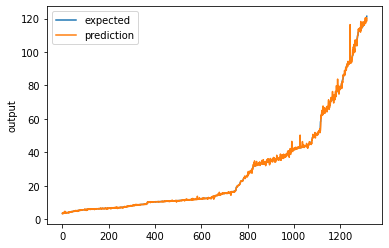

RMSE for activation_layers:'relu-adam'=  0.9986885190010071


In [32]:
pred = model.predict(x_test)
graphplot.regression_performance_metrics(y_test,pred,"Neural Networks",parameters)
graphplot.chart_regression(pred.flatten(),y_test)
activation_layers['relu-adam']=np.sqrt(metrics.mean_squared_error(y_test, pred)).astype(float) 
print("RMSE for activation_layers:'relu-adam'= ", activation_layers['relu-adam'])

###### **Case 2:ReLu-sgd**










In [27]:
layers=[100,10]
activation=["ReLu"]
optimizer=["sgd"]
parameters={'layers':layers, 'activation': activation, 'optimizer': optimizer}
print(parameters)

{'layers': [100, 10], 'activation': ['ReLu'], 'optimizer': ['sgd']}


In [33]:
import io
import requests
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

bestModelPath=os.path.join(dnn_path,"P2_NN_BestModel_CB2.hdf5")

checkpointer = ModelCheckpoint(filepath=bestModelPath, verbose=0, save_best_only=True) # save best model
start_time = datetime.now()
for i in range(5):
    print(i)
    model = Sequential()  
    model.add(Dense(50,input_dim=x_train.shape[1], activation='relu'))   
    model.add(Dense(10,activation='relu'))


    model.add(Dense(1))   
    model.compile(loss='mean_squared_error', optimizer='sgd')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
  
time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
model.load_weights(bestModelPath)



0
Epoch 1/1000
96/96 - 0s - loss: 90793.6719 - val_loss: 900.7433
Epoch 2/1000
96/96 - 0s - loss: 942.8814 - val_loss: 837.2983
Epoch 3/1000
96/96 - 0s - loss: 916.8444 - val_loss: 840.9472
Epoch 4/1000
96/96 - 0s - loss: 916.2075 - val_loss: 843.4666
Epoch 5/1000
96/96 - 0s - loss: 916.2194 - val_loss: 841.3941
Epoch 6/1000
96/96 - 0s - loss: 916.3301 - val_loss: 842.0996
Epoch 7/1000
96/96 - 0s - loss: 915.9541 - val_loss: 840.6934
Epoch 00007: early stopping
1
Epoch 1/1000
96/96 - 0s - loss: nan - val_loss: nan
Epoch 2/1000
96/96 - 0s - loss: nan - val_loss: nan
Epoch 3/1000
96/96 - 0s - loss: nan - val_loss: nan
Epoch 4/1000
96/96 - 0s - loss: nan - val_loss: nan
Epoch 5/1000
96/96 - 0s - loss: nan - val_loss: nan
Epoch 00005: early stopping
2
Epoch 1/1000
96/96 - 0s - loss: nan - val_loss: nan
Epoch 2/1000
96/96 - 0s - loss: nan - val_loss: nan
Epoch 3/1000
96/96 - 0s - loss: nan - val_loss: nan
Epoch 4/1000
96/96 - 0s - loss: nan - val_loss: nan
Epoch 5/1000
96/96 - 0s - loss: na

###### **Model Performance Evaluation**


-------- Performance Evalutation for  Neural Networks  --------
-------- Parameters:  {'layers': [100, 10], 'activation': ['ReLu'], 'optimizer': ['sgd']}  --------

RMSE         : 28.936111
MSE          : 837.2985
R2 score     : -0.0005874490270811883
-------- Regression Chart --------


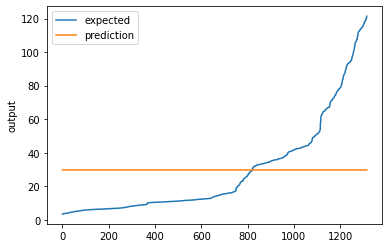

RMSE for activation_layers:'relu-sgd'=  28.936111450195312


In [34]:
pred = model.predict(x_test)
graphplot.regression_performance_metrics(y_test,pred,"Neural Networks",parameters)
graphplot.chart_regression(pred.flatten(),y_test)
activation_layers['relu-sgd']=np.sqrt(metrics.mean_squared_error(y_test, pred)).astype(float) 
print("RMSE for activation_layers:'relu-sgd'= ", activation_layers['relu-sgd'])

###### **Case 3:Sigmoid-adam**










In [ ]:
layers=[50,10]
activation=["sigmoid"]
optimizer=["adam"]
parameters={'layers':layers, 'activation': activation, 'optimizer': optimizer}
print(parameters)

In [ ]:
import io
import requests
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

bestModelPath=os.path.join(dnn_path,"P2_NN_BestModel_CB3.hdf5")

checkpointer = ModelCheckpoint(filepath=bestModelPath, verbose=0, save_best_only=True) # save best model
start_time = datetime.now()
for i in range(5):
    print(i)
    model = Sequential()  
    model.add(Dense(50,input_dim=x_train.shape[1], activation='sigmoid'))   
    model.add(Dense(10,activation='sigmoid'))

    model.add(Dense(1))   
    model.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
  
time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
model.load_weights(bestModelPath)



0
Epoch 1/1000
96/96 - 0s - loss: 1709.8915 - val_loss: 1460.4822
Epoch 2/1000
96/96 - 0s - loss: 1622.4183 - val_loss: 1402.4210
Epoch 3/1000
96/96 - 0s - loss: 1566.0176 - val_loss: 1355.1273
Epoch 4/1000
96/96 - 0s - loss: 1517.1320 - val_loss: 1312.4700
Epoch 5/1000
96/96 - 0s - loss: 1472.3163 - val_loss: 1273.0922
Epoch 6/1000
96/96 - 0s - loss: 1430.4249 - val_loss: 1236.7872
Epoch 7/1000
96/96 - 0s - loss: 1391.1434 - val_loss: 1202.3120
Epoch 8/1000
96/96 - 0s - loss: 1353.5452 - val_loss: 1169.1365
Epoch 9/1000
96/96 - 0s - loss: 1317.1031 - val_loss: 1136.6732
Epoch 10/1000
96/96 - 0s - loss: 1281.5449 - val_loss: 1105.4221
Epoch 11/1000
96/96 - 0s - loss: 1247.0273 - val_loss: 1074.8694
Epoch 12/1000
96/96 - 0s - loss: 1213.5338 - val_loss: 1045.3134
Epoch 13/1000
96/96 - 0s - loss: 1180.9448 - val_loss: 1016.5999
Epoch 14/1000
96/96 - 0s - loss: 1149.1168 - val_loss: 988.5040
Epoch 15/1000
96/96 - 0s - loss: 1118.0210 - val_loss: 961.0806
Epoch 16/1000
96/96 - 0s - loss: 1

###### **Model Performance Evaluation**


In [ ]:
pred = model.predict(x_test)
graphplot.regression_performance_metrics(y_test,pred,"Neural Networks",parameters)
graphplot.chart_regression(pred.flatten(),y_test)
activation_layers['sigmoid-adam']=np.sqrt(metrics.mean_squared_error(y_test, pred)).astype(float) 
print("RMSE for activation_layers:'sigmoid-adam'= ", activation_layers['sigmoid-adam'])

###### **Case 4:Sigmoid-sgd**










In [ ]:
layers=[50,10]
activation=["sigmoid"]
optimizer=["sgd"]
parameters={'layers':layers, 'activation': activation, 'optimizer': optimizer}
print(parameters)

In [ ]:
import io
import requests
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

bestModelPath=os.path.join(dnn_path,"P2_NN_BestModel_CB4.hdf5")

checkpointer = ModelCheckpoint(filepath=bestModelPath, verbose=0, save_best_only=True) # save best model
start_time = datetime.now()
for i in range(5):
    print(i)
    model = Sequential()  
    model.add(Dense(100,input_dim=x_train.shape[1], activation='sigmoid'))   
    model.add(Dense(50,activation='sigmoid'))

    model.add(Dense(1))   
    model.compile(loss='mean_squared_error', optimizer='sgd')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
  
time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
model.load_weights(bestModelPath)



###### **Model Performance Evaluation**


In [ ]:
pred = model.predict(x_test)
graphplot.regression_performance_metrics(y_test,pred,"Neural Networks",parameters)
graphplot.chart_regression(pred.flatten(),y_test)
activation_layers['sigmoid-sgd']=np.sqrt(metrics.mean_squared_error(y_test, pred)).astype(float) 
print("RMSE for activation_layers:'sigmoid-sgd'= ", activation_layers['sigmoid-sgd'])

###### **Case 5:tanh-adam**










In [ ]:
layers=[100,50]
activation=["tanh"]
optimizer=["adam"]
parameters={'layers':layers, 'activation': activation, 'optimizer': optimizer}
print(parameters)

In [ ]:
import io
import requests
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

bestModelPath=os.path.join(dnn_path,"P2_NN_BestModel_CB5.hdf5")

checkpointer = ModelCheckpoint(filepath=bestModelPath, verbose=0, save_best_only=True) # save best model
start_time = datetime.now()
for i in range(5):
    print(i)
    model = Sequential()  
    model.add(Dense(100,input_dim=x_train.shape[1], activation='tanh'))   
    model.add(Dense(50,activation='tanh'))
  

    model.add(Dense(1))   
    model.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
  
time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
model.load_weights(bestModelPath)



###### **Model Performance Evaluation**


In [ ]:
pred = model.predict(x_test)
graphplot.regression_performance_metrics(y_test,pred,"Neural Networks",parameters)
graphplot.chart_regression(pred.flatten(),y_test)
activation_layers['tanh-adam']=np.sqrt(metrics.mean_squared_error(y_test, pred)).astype(float) 
print("RMSE for activation_layers:'tanh-adam'= ", activation_layers['sigmoid-sgd'])

###### **Case 6:tanh-sgd**










In [ ]:
layers=[100,50]
activation=["tanh"]
optimizer=["sgd"]
parameters={'layers':layers, 'activation': activation, 'optimizer': optimizer}
print(parameters)

In [ ]:
import io
import requests
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

bestModelPath=os.path.join(dnn_path,"P2_NN_BestModel_CB6.hdf5")

checkpointer = ModelCheckpoint(filepath=bestModelPath, verbose=0, save_best_only=True) # save best model
start_time = datetime.now()
for i in range(5):
    print(i)
    model = Sequential()  
    model.add(Dense(100,input_dim=x_train.shape[1], activation='tanh'))   
    model.add(Dense(50,activation='tanh'))
  

    model.add(Dense(1))   
    model.compile(loss='mean_squared_error', optimizer='sgd')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
  
time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
model.load_weights(bestModelPath)



###### **Model Performance Evaluation**


In [ ]:
pred = model.predict(x_test)
graphplot.regression_performance_metrics(y_test,pred,"Neural Networks",parameters)
graphplot.chart_regression(pred.flatten(),y_test)
activation_layers['tanh-sgd']=np.sqrt(metrics.mean_squared_error(y_test, pred)).astype(float) 
print("RMSE for activation_layers:'tanh-sgd'= ", activation_layers['tanh-sgd'])

###### **Case 7:relu-custom_adam**










In [ ]:
layers=[100,50]
activation=["relu"]
optimizer=["custom_adam"]
parameters={'layers':layers, 'activation': activation, 'optimizer': optimizer}
print(parameters)

In [ ]:
import io
import requests
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime
from tensorflow.keras import optimizers


bestModelPath=os.path.join(dnn_path,"P2_NN_BestModel_CB7.hdf5")
adam_custom = optimizers.Adam(learning_rate=0.1 , beta_1 = 0.8, beta_2 = 0.99)

checkpointer = ModelCheckpoint(filepath=bestModelPath, verbose=0, save_best_only=True) # save best model
start_time = datetime.now()
for i in range(5):
    print(i)
    model = Sequential()  
    model.add(Dense(100,input_dim=x_train.shape[1], activation='relu'))   
    model.add(Dense(50,activation='relu'))
  

    model.add(Dense(1))   
    model.compile(loss='mean_squared_error', optimizer=adam_custom)
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
  
time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
model.load_weights(bestModelPath)



###### **Model Performance Evaluation**


In [ ]:
pred = model.predict(x_test)
graphplot.regression_performance_metrics(y_test,pred,"Neural Networks",parameters)
graphplot.chart_regression(pred.flatten(),y_test)
activation_layers['relu-custom_adam']=np.sqrt(metrics.mean_squared_error(y_test, pred)).astype(float) 
print("RMSE for activation_layers:'relu-custom_adam'= ", activation_layers['relu-custom_adam'])

###### **Case 8:relu-custom_sgd**










In [ ]:
layers=[100,50]
activation=["relu"]
optimizer=["custom_sgd"]
parameters={'layers':layers, 'activation': activation, 'optimizer': optimizer}
print(parameters)

In [ ]:
import io
import requests
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

bestModelPath=os.path.join(dnn_path,"P2_NN_BestModel_CB8.hdf5")
sgd_custom = optimizers.SGD(lr=0.01, decay=1e-3, momentum=0.8, nesterov=True)

checkpointer = ModelCheckpoint(filepath=bestModelPath, verbose=0, save_best_only=True) # save best model
start_time = datetime.now()
for i in range(5):
    print(i)
    model = Sequential()  
    model.add(Dense(100,input_dim=x_train.shape[1], activation='relu'))   
    model.add(Dense(50,activation='relu'))
  

    model.add(Dense(1))   
    model.compile(loss='mean_squared_error', optimizer=sgd_custom)
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
  
time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
model.load_weights(bestModelPath)



###### **Model Performance Evaluation**


In [ ]:
pred = model.predict(x_test)
graphplot.regression_performance_metrics(y_test,pred,"Neural Networks",parameters)
graphplot.chart_regression(pred.flatten(),y_test)
activation_layers['relu-custom_sgd']=np.sqrt(metrics.mean_squared_error(y_test, pred)).astype(float) 
print("RMSE for activation_layers:'relu-custom_sgd'= ", activation_layers['relu-custom_sgd'])

##### **CASE C: MULTIPLE LAYERS- COMBINATION ACTIVATION FUNCTIONS**

###### **Case 1:relu-sigmoid-tanh**










In [ ]:
layers=[100,10,50]
activation=["relu, sigmoid, tanh"]
optimizer=["adam"]
parameters={'layers':layers, 'activation': activation, 'optimizer': optimizer}
print(parameters)

In [ ]:
import io
import requests
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

bestModelPath=os.path.join(dnn_path,"P2_NN_BestModel_CC1.hdf5")
sgd_custom = optimizers.SGD(lr=0.01, decay=1e-3, momentum=0.8, nesterov=True)

checkpointer = ModelCheckpoint(filepath=bestModelPath, verbose=0, save_best_only=True) # save best model
start_time = datetime.now()
for i in range(5):
    print(i)
    model = Sequential()  
    model.add(Dense(100,input_dim=x_train.shape[1], activation='relu'))   
    model.add(Dense(10,activation='sigmoid'))
    model.add(Dense(50,activation='tanh'))
  

    model.add(Dense(1))   
    model.compile(loss='mean_squared_error', optimizer=sgd_custom)
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
  
time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
model.load_weights(bestModelPath)



###### **Model Performance Evaluation**


In [ ]:
pred = model.predict(x_test)
graphplot.regression_performance_metrics(y_test,pred,"Neural Networks",parameters)
graphplot.chart_regression(pred.flatten(),y_test)
combination=np.sqrt(metrics.mean_squared_error(y_test, pred)).astype(float) 
print("RMSE for combination layers- relu, sigmoid, tanh", combination)

##### **FINAL RESULTS**

In [ ]:
print("******************************************************************")
print("* RMSE for multiple layers")
print("******************************************************************")

for x,y in multiple_layers.items():
  print('RMSE for layers: ', x , " is ", y)
  print("------------------------------------------------------------------------")

print("******************************************************************")
print("* RMSE for activation-optimizer combination")
print("******************************************************************")
for x,y in activation_layers.items():
  print('RMSE for activation-optimizer: ', x , " is ", y)
  print("------------------------------------------------------------------------")

print("******************************************************************")
print("* RMSE for multi activation-optimizer combination")
print("******************************************************************")
print('RMSE for activation-optimizer: ' , " is ", combination)
print("------------------------------------------------------------------------")